# Are Americans Losing Their Faith?

### By Korrenti Mayweather

Since the pre-modern era, human beings have pondered our existence and reflected on our place in the Universe.  We began expressing our sense of purpose through the belief that there must be some intelligence greater than ourselves responsible for our existence and began dedicating our lives to please these entities, deifying them.  With the prevalence of the internet and thus information being more readily available in developed countries like the United States, there is a sense that the glamor of faith is beginning to lose its luster.  

So, are Americans losing their faith?  To explore this question, we must first define "faith".  For this, we'll defer to the Oxford dictionary's definition of faith - "Strong belief in the doctrines of a religion, based on spiritual conviction rather than proof".  Since the most prominent religion in the United States, Christianity, was formed around the idea of the existence of a deity, we'll extend our definition of faith to include a belief in a deity (namely, the Christian God) as well.  We'll also be using the terms 'American', 'the United States' and 'the U.S.' interchageably given their colloquial usage.   Now that we have defined some key terms, we will seek answers to three questions:  

1. What does it mean to lose faith?

2. What factors can be said to contribute to the loss of faith?

3. Of those factors that contribute to a loss of faith, which has had the greatest effect?

## What does it mean to lose faith?

To answer our first question, since the act of having faith was built on the foundation of belief, we can justify the idea of losing faith to mean that one no longer believes in one's religion and, perhaps more importantly, it's deity.  Since we are dealing with a change in culture over time, its important to note that faith can not only be lost on an individual basis, but also from generation to generation.   

## Our Data

For our exploration toward answering these questions, we'll use three datasets: the World Religion Dataset from ARDA (the Association of Religion Data Archives) that spans 14 waves from 1945 to 2010, the 2014 U.S. Internet Use Survey by the U.S. Census Bureau, and the 2014 Religious Landscape Study dataset from the Pew Research Center.  Let's start with a histogram of our first dataset to assess whether our data is normally distributed, meaning 67% of our data falls within one standard deviation of the mean.  We do this by using the probability density function for a normally distributed variable:

\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

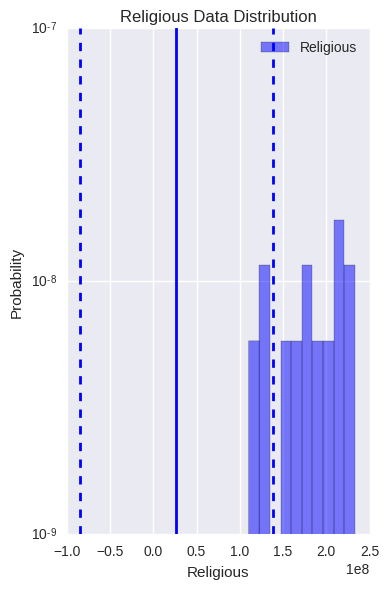

/home/sollertis7/anaconda3/lib/python3.5/site-packages/scipy/stats/mstats_basic.py:2231: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  np.min(n))


NormaltestResult(statistic=1.5563776287290247, pvalue=0.45923702201828387)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from savReaderWriter import SavReaderNp
from savReaderWriter import SavReader
import scipy.stats
%matplotlib inline

# Loading our Dataset into a Dataframe
df = pd.read_csv('World-Religion-Dataset-National-Religion-Dataset.csv', thousands=',')

plt.figure(figsize=(4,6))

mu = 30142342.894 # mean of distribution (religious)
sigma = 106861016.631 # standard deviation of distribution (religious)
j = mu + sigma * np.random.randn(13)


# Slicing portions of the data we want to work with and assigning them to variables
christian = df['CHRSGEN'][0:14]
pop = df['POP'][0:14]
year = df['YEAR'][0:14]

norm = j

# plotting our standard deviation lines
plt.axvline(norm.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(norm.mean()-norm.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(norm.mean()+norm.std(), color='b', linestyle='dashed', linewidth=2)

sumrelig = plt.hist(christian, normed=True, color='blue', label='Religious', alpha=.5)

plt.legend()

plt.ylabel('Probability')
plt.xlabel('Religious')
plt.title('Religious Data Distribution')

plt.yscale('log')

plt.tight_layout()

plt.show()

scipy.stats.mstats.normaltest(christian)

Looks like our data is not normally distributed.  The dotted lines represent one standard deviation from our mean and show that most of our data is outside of them.  Also, our normal test results indicate non-normal data as our p-value is small enough reject the probability that our sample came from a normal distribution. It's also important to note that the normal test is most accurate with 20 or more data points and we only have 14.  Let's dive a little deeper into our data.

It is worth noting that exploring the changes in adherents of every religion in the United States would be exaustive but counter-productive to arriving at a meaningful conclusion to our question.  The gist here is, what is happening with most Americans in the U.S. and religion?  With this in mind, I have decided to look at how the number of people identifying as Christian in the United States has changed over the years given its dominance amongst American religious belief.

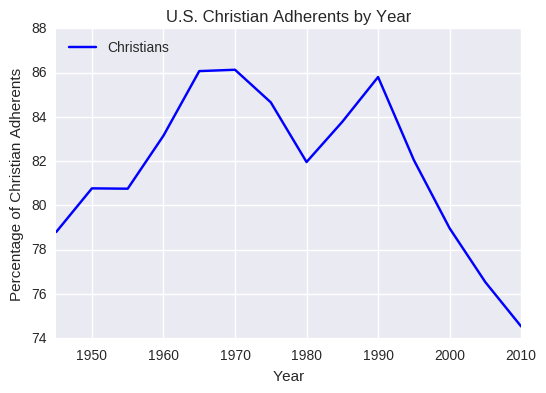

In [2]:
# Slicing portions of the data we want to work with and assigning them to variables
christian = df['CHRSGEN'][0:14]
pop = df['POP'][0:14]
year = df['YEAR'][0:14]

# Normalizing for population
crp_norm = (christian / pop) * 100

# Plotting our data
christ, = plt.plot(year, crp_norm, color='blue', label = 'Christians')
plt.xlabel('Year')
plt.ylabel('Percentage of Christian Adherents')
plt.title('U.S. Christian Adherents by Year')
plt.legend(loc = 'upper left', handles=[christ])
plt.xlim([1945, 2010])

plt.show()

As you can see, there is more than an 11 percent drop in Christian adherents between 1990 and 2010 when normalized for the U.S. population. What is happening here?  Let's add to our graph the trend of those identifying as non-religious over the same period. 

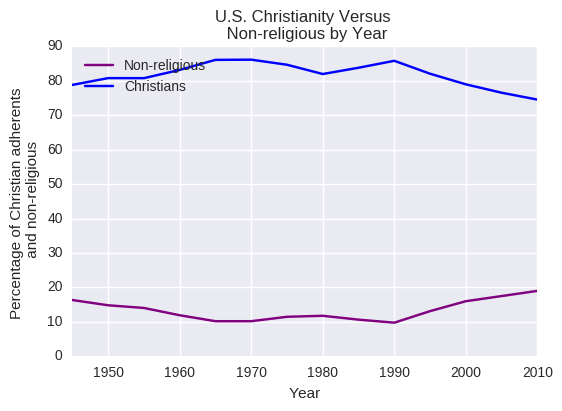

In [3]:
# Slicing the data
nonrelig = df['NONRELIG'][0:14]

# normalizing for population
nrp_norm = (nonrelig / pop) * 100

# Assigning variables
nonrel, = plt.plot(year, nrp_norm, color='purple', label = 'Non-religious')
christ, = plt.plot(year, crp_norm, color='blue', label = 'Christians')

# Plotting our data
plt.xlabel('Year')
plt.ylabel('Percentage of Christian adherents \n and non-religious')
plt.title('U.S. Christianity Versus \n Non-religious by Year')
plt.legend(loc = 'upper left', handles=[nonrel, christ])
plt.xlim([1945, 2010])

plt.show()

Wow!  We see the inverse of the Christian trend with those saying they are non-religious and it takes a huge turn beginning in 1990 to the tune of 9 percent over the next 10 years.  Clearly, Americans in the U.S. are losing their faith, but why?

## What is causing the loss of faith in America?

Before we get into the significance of the 90's as they relate to these trends in religion, I figured we should explore our second question to see how the data changes across demographics like access to the internet, income, education, birth generation, race, gender, and geographic region.  Here, we'll take the meaning of losing faith a bit further with the introduction of the label atheist, a greek word literally meaning "without god" with a colloquial understanding of "without belief in any gods".  We'll see if we can find any significant correlation with the rapid loss of faith in the 90's.  Let's start with how atheism is distributed across generations using data from a 2014 study of the religious landscape in the U.S. by the Pew Research Center.

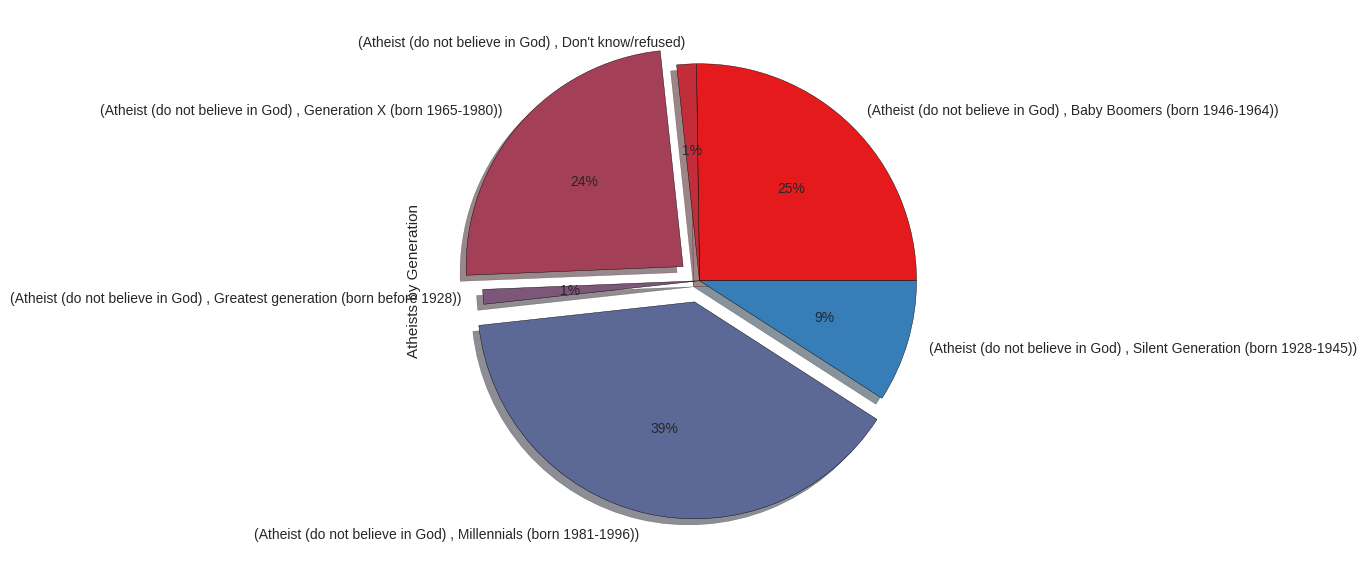

In [4]:
# loading another data set
df_rls = pd.read_csv('2014-religious-landscape-study.csv', thousands=',', low_memory=False)
rel_gnrtn = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Respondent\'s generational cohort_labels'])['Respondent\'s generational cohort_labels'].count()

# exploding interesting parts of our graph
explode = (0,0,.1,0,.1,0)
n1 = 35073 

# slicing data
atheist_gnrtn = rel_gnrtn[13:19]

christ_gnrtn = rel_gnrtn[45:52]

# plotting our data
cs=cm.Set1(np.arange(40)/40.)
atheist_gnrtn.plot(kind='pie', figsize=(7,7), label='Atheists by Generation', explode=explode, shadow=True, colors=cs, autopct='%1.0f%%')
plt.show()

Here, we can see a steady loss of faith over generations but something significant is happening when we look at the amount of atheist millennials.  Atheism amongst millennials has grown 15% over Generation X.  Why has there been so much growth in atheism during this time?  

My theory is that the Internet, the most significant human advancement during this period, may have something to do with it.  So far, this data is converging nicely with our graph showing the inverse relationship between Christians and the non-religious during the 90's.  Let's see how the relationship with the non-religious stacks up agaisnt the growing trend of households with Internet in the U.S.

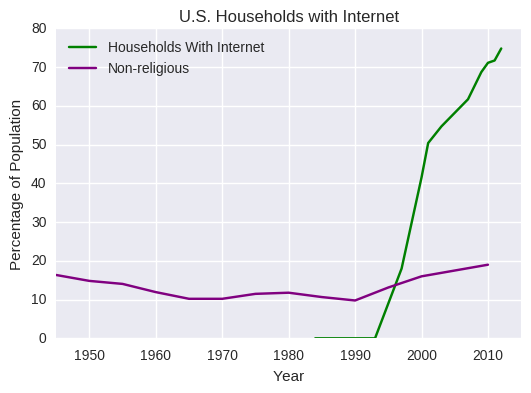

In [5]:
# loading our internet use data set
df3 = pd.read_csv('Internet_Use_USA_cor.csv', thousands=',')[8:20][::-1]


# assigning variables for year and percentages
year2 = df3['YEAR'].astype('int')
tot = df3['TOTAL_NUM'].astype('int')
percom = df3['PER_COM'].astype('float')
pernet = df3['PER_NET'].astype('float')

# plotting the data
net_by_year, = plt.plot(year2, pernet, color='green', label = 'Households With Internet')
nonrel, = plt.plot(year, nrp_norm, color='purple', label = 'Non-religious')

plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('U.S. Households with Internet')
plt.legend(loc='upper left', handles=[net_by_year, nonrel])
plt.xlim([1945, 2015])
plt.show()

Although we don't have data for households with internet before 1993, it is interesting to note that as more households became connected to the net, more people began reporting that they were non-religious.  The amount of people reporting to be non-religious has increased 6% since reports of households being connected to the Internet began.  

Perhaps as more information becomes readily available, more people begin to question the foundations of their religious beliefs.  However, despite access to any particular source of information, what could cause people to be critical of their religious beliefs?  As critical thinking skills generally become more refined with education, let's take a look at how Christians and Atheists fare when it comes to education. 

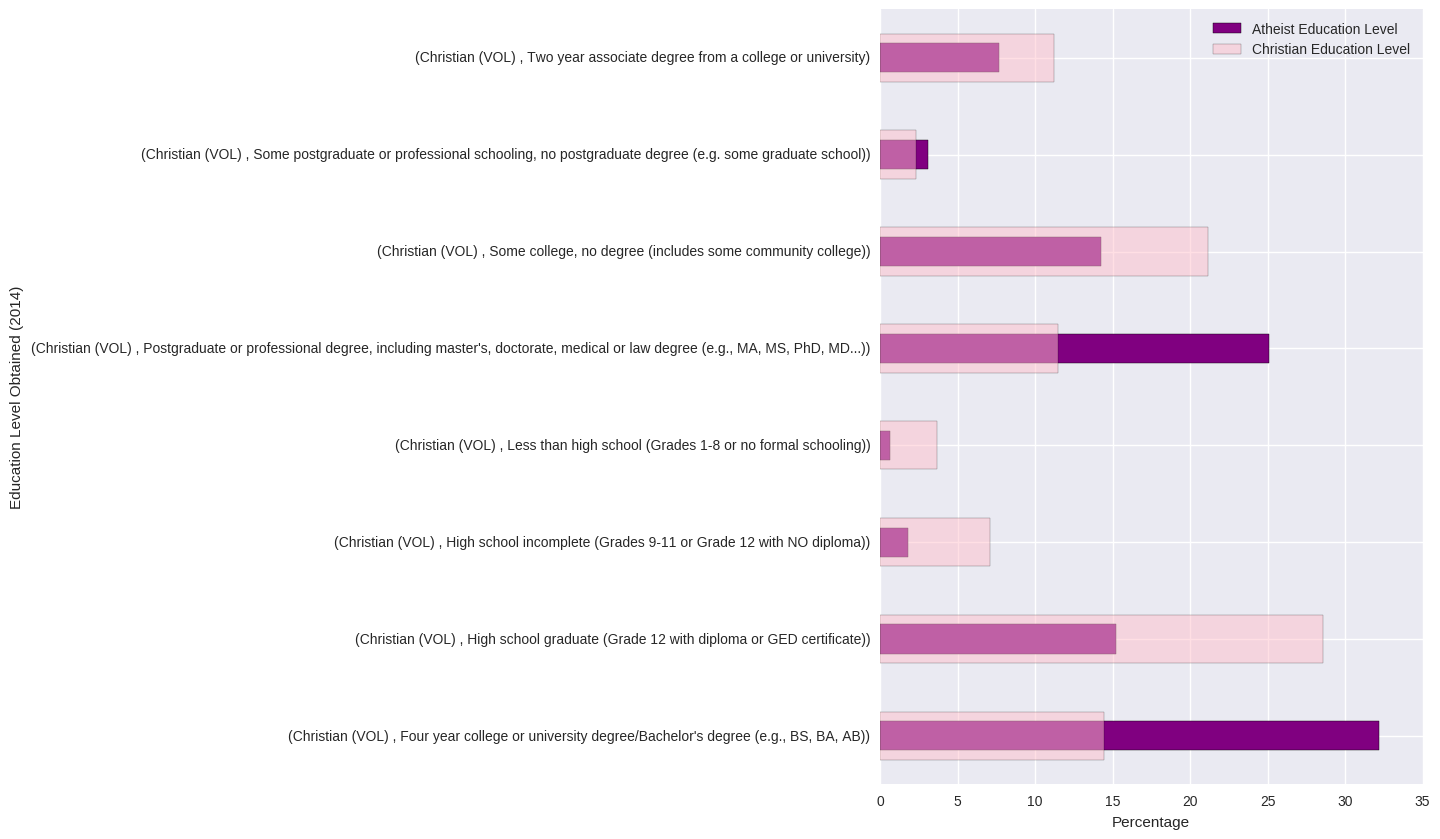

In [6]:
# grouping the data by religion and education
rel_educ = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'EDUC. What is the highest level of school you have completed or the highest degree you have received? _labels'])['Which of the following describes your race?_labels'].count()
atheist_educ = rel_educ[18:26] / rel_educ[18:26].sum() * 100
christ_educ= rel_educ[44:52] / rel_educ[44:52].sum() * 100

# our width variable for one of our bar sizes
w = 0.3

# plotting the data
atheist_educ.plot(kind='barh', width = w, figsize=(7,10), color='purple', label='Atheist Education Level')
christ_educ.plot(kind='barh', figsize=(7,10), color='pink', alpha=.5, label='Christian Education Level' )
plt.legend(loc='upper right')
plt.ylabel('Education Level Obtained (2014)')
plt.xlabel('Percentage')

plt.show()

Based on the data, it seems more Atheists tend to have graduate and postgraduate level degrees and more Christians tend to have only high school diplomas.  One might reasonably infer that the higher the education level attained, the more likely one is to be an Atheist.

Let's see what happens when we juxtapose Atheists and Christians with income.

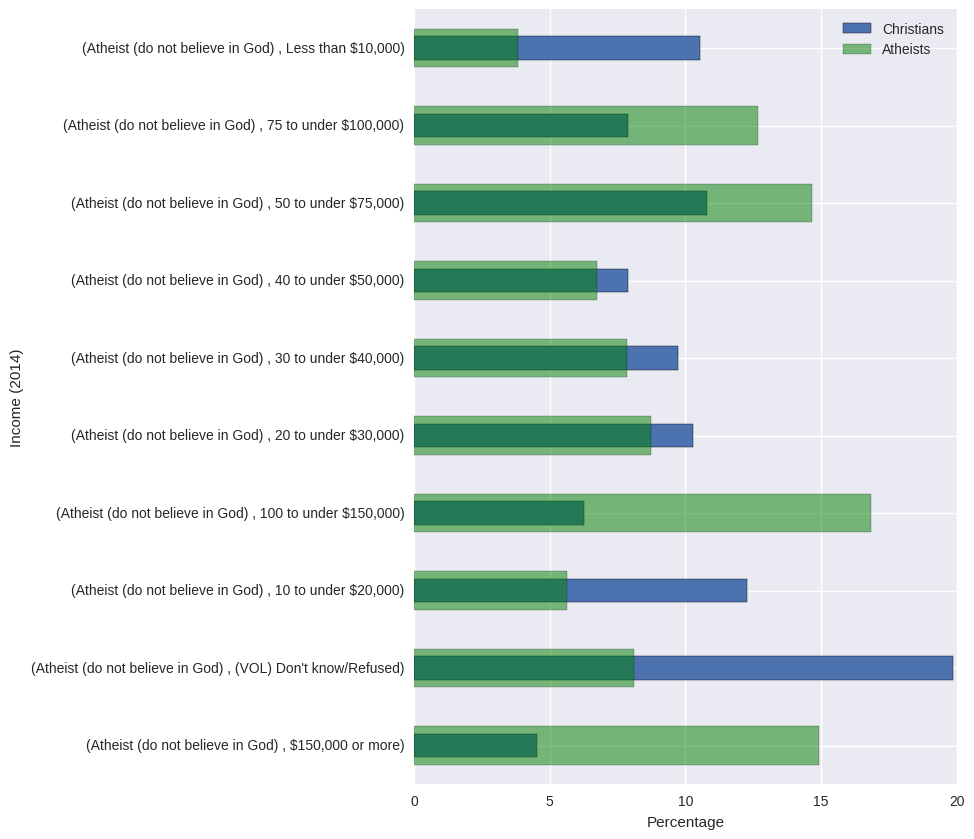

In [7]:
# grouping the data by religion and income
rel_income = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'INCOME. Last year, that is in 2013, what was your total family income from all sources, before taxes? Just stop me when _labels'])['EDUC. What is the highest level of school you have completed or the highest degree you have received? _labels'].count()
atheist_income = rel_income[19:29] / rel_income[19:29].sum() * 100
christ_income = rel_income[47:57] / rel_income[47:57].sum() * 100

# our width for our bar size change
w = 0.3

# plotting our bar graphs
christ_income.plot(kind='barh',width=w, figsize=[7, 10], label="Christians")
atheist_income.plot(kind='barh', figsize=[7, 10], color='g', alpha=.5, label="Atheists")

plt.legend(loc='upper right')
plt.ylabel('Income (2014)')
plt.xlabel('Percentage')
plt.show()

Its no surprise Atheists generally tend to earn more than Christians given that earning potential increases with education, but could it be that Christians are losing their faith as they become more educated and thus more financially independent? Let's take a look at a few other potential contributors to Christians losing faith like race, gender, the state lived in, and political affiliation.

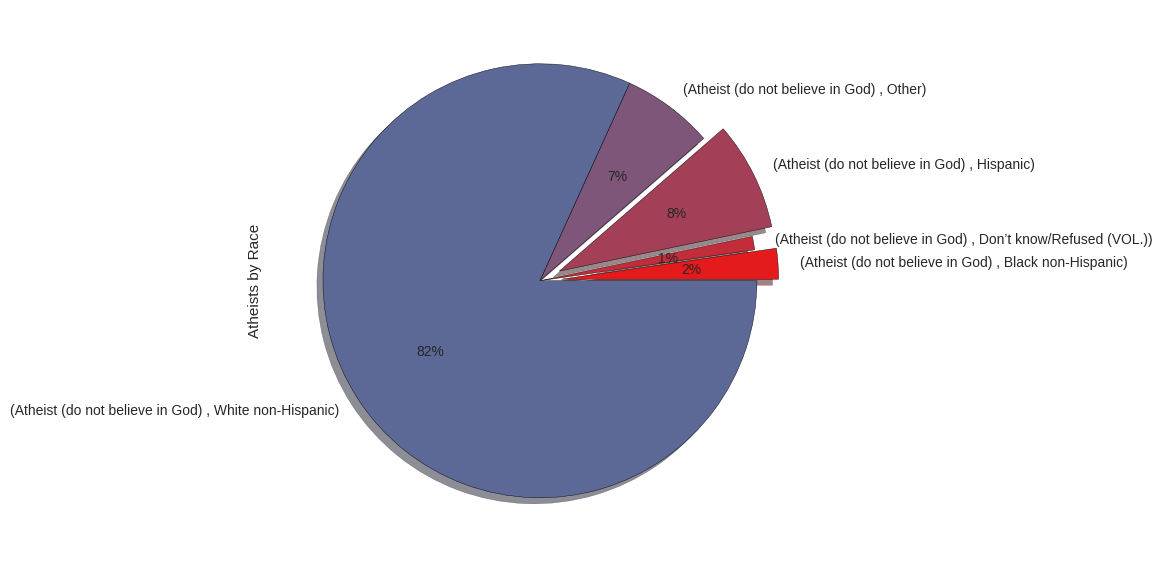

In [8]:
# grouping by religion and race
rel_race = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Race-Ethnicity_labels'])['Race-Ethnicity_labels'].count()
atheist_race = rel_race[10:15]
christ_race = rel_race[45:52]

# highliting interesting parts of the chart
explode = (.1,0,.1,0,0)

# plotting our pie chart
cs=cm.Set1(np.arange(40)/40.)
atheist_race.plot(kind='pie', figsize=(7,7), label='Atheists by Race', colors=cs, explode=explode, shadow=True, autopct='%1.0f%%')
plt.show()

Its a no-brainer that most of the faithless Americans are White given they make up 63% of the U.S. population.  I was surprised,  however, to find so many faithless minorities. With more data, we could see if changing social dynamics between races, like geographical integration, interacial relationships, or cultural tolerance as a result of changes in our political climate (having our first African-American President comes to mind), may have impacted the rate of change in religious status.  The idea is, perhaps some of these factors might cause more interaction between ethnicities and therefore more exchanges of ideas, culture, and values.  Let's see what the relationship between Atheists and political affiliation looks like.

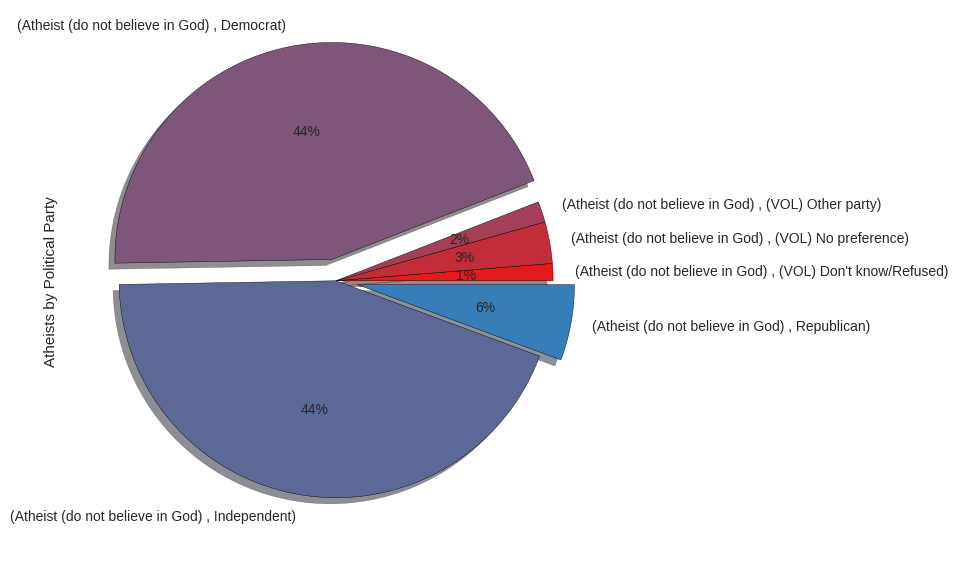

In [9]:
# grouping by religion and political affiliation
rel_pol_party = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'PARTY. In politics TODAY, do you consider yourself a Republican, Democrat, or Independent?_labels'])['PARTY. In politics TODAY, do you consider yourself a Republican, Democrat, or Independent?_labels'].count()
atheist_pol_party = rel_pol_party[12:18]
christ_pol_party = rel_pol_party[45:52]

# showing the important parts of the chart
explode = (0, 0, 0, .1, 0, .1)

# plotting our chart
cs=cm.Set1(np.arange(40)/40.)
atheist_pol_party.plot(kind='pie', figsize=(7,7), label='Atheists by Political Party', colors=cs, explode=explode, shadow=True, autopct='%1.0f%%')
plt.show()

Its interesting to see that Atheists are split to either being Democrat or Independent with only 6% affilliating with Republican.  Given the tendancy of human beings to congregate with those who share their sentiments, lets see how geographic demarcation correlates with the loss of religious faith in America.

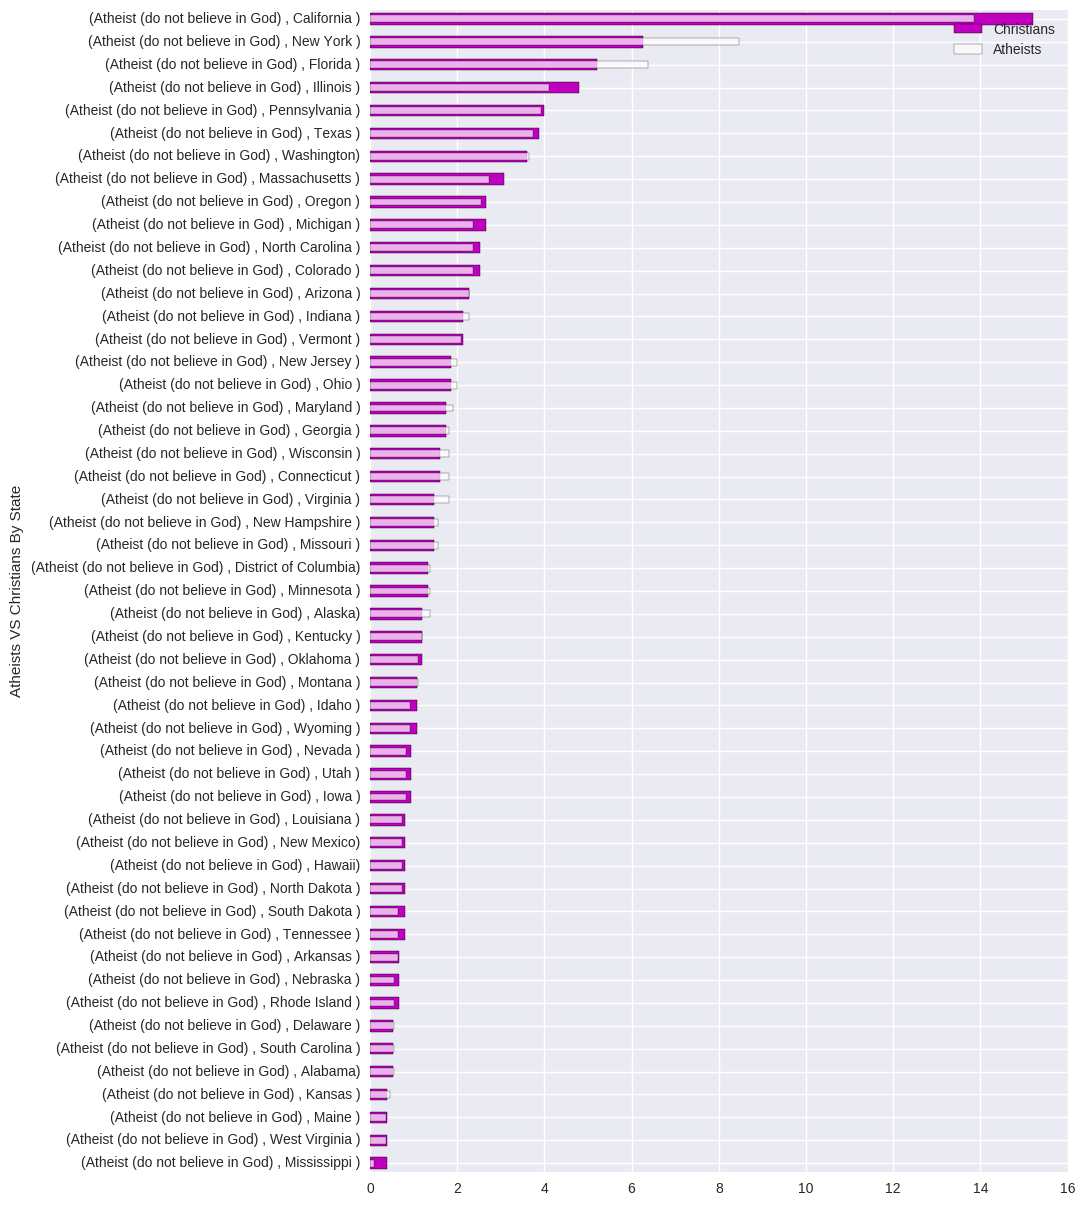

In [10]:
# grouping by religion and state

reli = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'State based on self-reported zipcode_labels'])['State based on self-reported zipcode_labels'].count()

# assigning and slicing variables
atheism_by_state = reli[61:112] / reli[61:112].sum() * 100
christ_by_state = reli[173:224] / reli[173:224].sum() * 100

christ_state = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'State based on self-reported zipcode_labels'], as_index=False)['State based on self-reported zipcode_labels']

# plotting our graph
w = 0.3
ax = christ_by_state.sort_values(axis=0, ascending =True).plot(kind='barh', figsize=[9,15], color='m', label='Christians')

ax2 = atheism_by_state.sort_values(axis=0, ascending =True).plot(kind='barh', width=w, figsize=[9,15], color='w', alpha=.7, label='Atheists')

plt.ylabel('Atheists VS Christians By State')
plt.legend(loc='upper right')
plt.show()


Here, we see some states have a higher percentage of Atheists than others like California, New York, and Florida.  However, there is no way to ascertain whether there is a  correlation between growing up in certain states and Americans losing their faith without data showing the changes of Atheists and Christians per state over time.  So, to draw any reasonable conclusions here, we will need more data.   Just because we can, let's take a look at Atheism by gender.

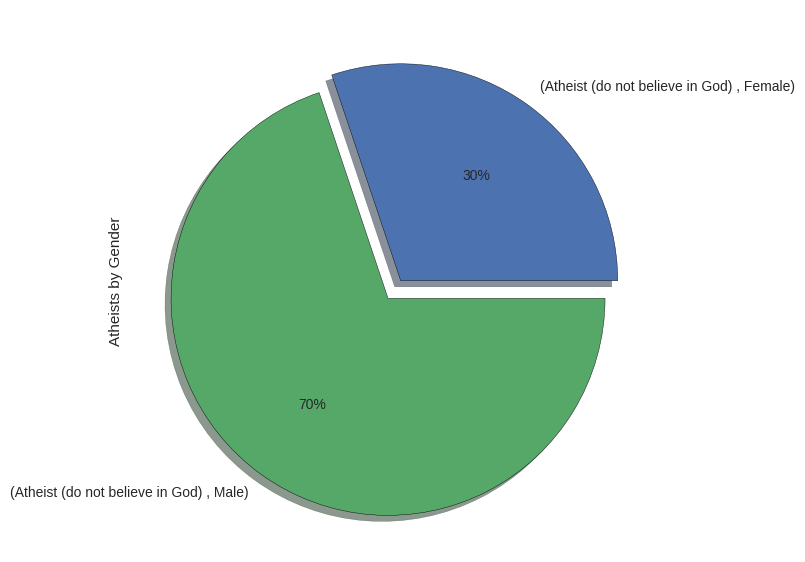

In [11]:
# grouping our data by religion and generation
rel_gen = df_rls.groupby(['What is your present religion, if any? Are you Protestant, Roman Catholic, Mormon, Orthodox such as Greek or Russian Ort_labels', 'Respondent\'s sex. Based on respondent\'s self-report, unless the respondent declined to answer the question or indicated _labels'])['Respondent\'s sex. Based on respondent\'s self-report, unless the respondent declined to answer the question or indicated _labels'].count()
atheist_gen = rel_gen[8:10]
christ_gen = rel_gen[45:52]

explode= (0, .1)

# plotting the data
atheist_gen.plot(kind='pie', figsize=(7,7), label='Atheists by Gender', explode=explode, shadow=True, autopct='%1.0f%%')
plt.show()

As you can see, more males have a lack of faith than females.  It would be great if we had more data to see the percentage of men and women who have reported to be faithless over time.  I hope to seek more datasets in the future to see if we can find any reasonable correlation with this.  Although we've looked at quite a few variables, I can't help but wonder what we'd find if we had more data.  Nonetheless, let's see if we can draw any reasonable conclusions based on the data we have explored thus far. 

## What caused Americans to lose their faith the most?

After exploring all of our data, it seems one might reasonably infer that the Internet, education, and the generation one is born in have a correlation with the drop in Christian faith in the U.S., but which affects the faith of Americans most?  The most significant correlation seems to be the Internet but it would be nice to give weight to each according to the probability of their impact on Americans losing faith.  Let's make sure our findings in comparing these groups are meaningful.  Given the non-normality of our data, we'll run a Spearman correlation test to ascertain if there is any significance to these perceived correlations.

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.spearmanr.html

In [12]:
nonrel_samp = df['NONRELIG'][2:14]

mu_gen = rel_gnrtn[13:19]

mu_ed = rel_educ[18:26]

# running the Spearman test
print(scipy.stats.spearmanr(nonrel_samp, pernet))

SpearmanrResult(correlation=0.91551565976519833, pvalue=2.9374951270928633e-05)


The results of the Spearman test above gives us a rank-order coefficient.  With a coefficient so close to 1, there is clearly a strong correlation between household internet access and the loss of religious faith.  The very small p-value from the Spearman test indicates there is a low probability that we could get a coefficient this strong if our datasets were uncorrelated.  We can be fairly certain of statistical significance here.  However, given our small sample sizes, we have to be careful granting statistical relevance to our findings.  Let's see how our other samples compare to Americans losing their faith.

In [13]:
nonrel_samp_6 = df['NONRELIG'][8:14]

#running the Spearman test
print(scipy.stats.spearmanr(nonrel_samp_6, mu_gen))

SpearmanrResult(correlation=0.14285714285714288, pvalue=0.7871720116618075)


Looking at the results of our Spearman test comparing one's birth generation with a lack of faith, we don't see much of a correlation here.  Furthermore, the relatively large p-value tells us this relationship is likely not statistically significant.  However, we still have to be careful drawing any solid conclusions here given such small sample sizes.  Finally, we'll take a look at the trend of attaining post-secondary degrees and its possible relationship with the faithless.

In [14]:
nonrel_samp_8 = df['NONRELIG'][6:14]
df_ed = pd.read_csv('coll_grad3.csv', thousands=',', low_memory=False)
coll_grad = df_ed.groupby(['YEAR'])['BACH GRAD'].sum()[0:8].astype(float) * 100

# running another Spearman test
print(scipy.stats.spearmanr(nonrel_samp_8, coll_grad))

SpearmanrResult(correlation=0.76190476190476208, pvalue=0.028004939153071794)


Here, we can definitely see a strong correlation between a lack of faith and higher education.  The low p-value tells us our correlation coefficient is definitely significant.

## Conclusion

We dove head first down the rabbit hole of the human condition in hopes to catch a glimmer of reason for why we might lose something that, for many of us, has been the very foundation of our existential paradigm.  We found significant evidence that human beings are indeed losing their faith and posited some potential causes for this change.  Instead of explicit causation for the faithless trend encroaching on the memes of the human experience, we found strong statistical correlations between the Internet, education and the non-religious.  

   It's not shocking that the Internet, one of our greatest achievements of the last century, would have the power to shake the very core of our understanding of who we are and our purpose in life.  The internet brings to bear the aggregate of human knowledge upon any problem we might face almost instantaneously - realizing our dream of standing on the shoulders of giants.  It has become the primary source for our thirst for knowledge which explains why it shares correlation with education in our analysis.  Perhaps the more we're able to use tools like Data Science to gain insights into human behavior, the less fear we will have of the unknown as we'll know it's simply another thing for us to conquer.  
   
   I look forward to gaining more scientific tools with which to explore tough questions and hopefully find solutions to many of the problems that face humanity.  I would definitely like to revisit this capstone with more knowledge, time and data at my disposal to see what gems lie herein.  With larger datasets, I'm confident I would be able to glean statistical relevence as well as significance from the data.   I would like to thank my mentor, Shubhabrata Roy, for all of his help as I could not have done much of this without him. 